In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
import pandas as pd

# Read from Pickle file

### Training Data

In [19]:
train = pd.read_pickle("dataset/all_jets_train_4D_100_percent.pkl")
train.head()

,m,pt,phi,eta
132784,3831.839355,22000.609375,1.567018,1.142924
99666,4582.417480,21648.210938,-2.680558,0.213654
26629,16747.765625,169514.281250,-1.948239,1.163296
80473,14789.586914,183085.609375,-1.641102,2.670927
48229,4646.724121,20527.130859,2.922270,-1.158871


### Test Data

In [18]:
test = pd.read_pickle("dataset/all_jets_test_4D_100_percent.pkl")
test.head()

,m,pt,phi,eta
85972,4983.729980,23798.070312,1.962157,-0.059532
38742,5435.273438,21881.867188,1.035412,0.734343
128711,5239.408691,24608.134766,-1.121055,0.828848
28751,14121.240234,203110.953125,0.324205,-2.571108
131358,3344.826660,24897.294922,0.395331,1.440069


# Data Analysis
Number of Training set examples: 111,778 

Number of Test set examples: 27,945

Train/Test Percentage: 60:40

## Visualization

In [13]:
import matplotlib.pyplot as plt
import numpy as np

Code reused from HEPAutoencoders/process_ROOT_4D.ipynb (https://github.com/Skelpdar/HEPAutoencoders/blob/master/process_ROOT_4D.ipynb)

In [37]:
# Store all the figures in the figures/ folder
figures_folder = 'figures/'

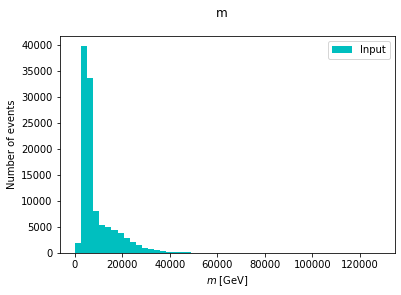

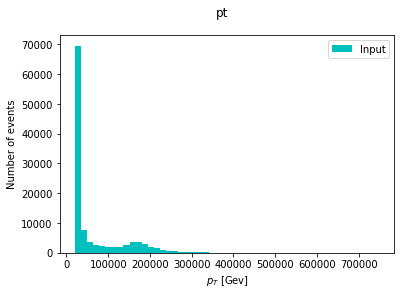

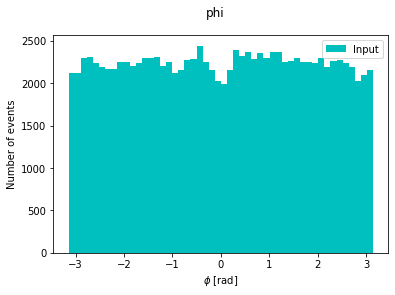

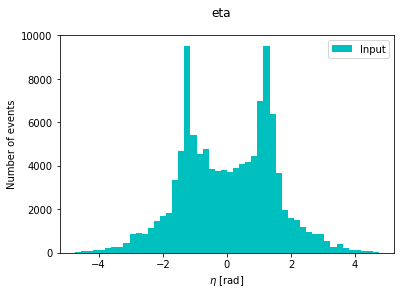

In [38]:
plt.close('all')
unit_list = ['[GeV]', '[Gev]', '[rad]', '[rad]']
variable_list = [r'$m$', r'$p_T$', r'$\phi$', r'$\eta$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

# Histograms
idxs = (0, 111778)  # Choose events to compare
data = train[idxs[0]:idxs[1]].values

alpha = 1
n_bins = 50
for i in np.arange(4):
    plt.figure(i + 4)
    n_hist_data, bin_edges, _ = plt.hist(data[:, i], color=colors[1], label='Input', alpha=alpha, bins=n_bins)
    plt.suptitle(test.columns[i])
    plt.xlabel(variable_list[i] + ' ' + unit_list[i])
    plt.ylabel('Number of events')
    plt.legend()
    fig_name = 'train_data_hist_%s' % train.columns[i]
    plt.savefig(figures_folder + fig_name)

### Mean and Std of each variable

In [46]:
print("Std:\n", train.std())
print("Mean:\n", train.mean())

Std:
 m       7421.270111
pt     69874.993026
phi        1.803151
eta        1.448439
dtype: float64
Mean:
 m       8941.356799
pt     64458.683471
phi        0.001691
eta        0.043500
dtype: float64


## Scaling Data
#### Why scaling helps: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [47]:
from sklearn import preprocessing

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
mm_scaler.transform(X_test)